<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-orden-66/blob/main/Reto_Entrega_2_Equipo_66.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ciencia y Analítica de Datos
***Maestria en Inteligencia Artificial Aplicada***

Reto-> Entrega 1 (16/11) -> Limpieza, análisis, visualización y kmeans

**Profesora:**

Dra. María de la Paz Rico Fernández

Mtr. Orlando Figón Cruz


**Alumnos:**

Fernando Ivan Ramos Esparza 

Roberto Ferro Salinas

**Matrículas:**

A01373377

A01374849

In [24]:
!pip install --upgrade geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 16.7 MB 54.1 MB/s 
     |████████████████████████████████| 6.3 MB 46.5 MB/s 


In [25]:
!pip install --upgrade qeds

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 179 kB 8.2 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=6bbd838dd760d853ad31bd0ae5ba260e4547c7c2c0f28699929d0c52f82518b7
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
Successfully built qeds


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import requests, zipfile
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();



from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import power_transform
from sklearn.impute import SimpleImputer
from sklearn.feature_selection._base import SelectorMixin
from sklearn.feature_extraction.text import _VectorizerMixin
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt 
import seaborn as sns
import math as math

## Limpiamos los datos de la base de datos


In [27]:
!wget = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'

--2022-11-18 22:33:05--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2022-11-18 22:33:05--  http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip
Connecting to 201.116.60.46:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2556825 (2.4M) [application/x-zip-compressed]
Saving to: ‘Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip.1’

Datos_de_calidad_de 100%[===================>]   2.44M  1.82MB/s    in 1.3s    

2022-11-18 22:33:06 (1.82 MB/s) - ‘Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip.1’ saved [2556825/2556825]

FINISHED --2022-11-18 22:33:06--
Total wall clock time: 1.5s
Downloaded: 1 files, 2.4M in 1.3s (1.82 MB/s)


In [28]:
!unzip /content/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip

Archive:  /content/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip
replace Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [29]:
!ls

Datos_de_calidad_del_agua_2020
Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip
Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip.1
sample_data


In [55]:
df = pd.read_csv("Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv",  encoding = 'latin1')

In [56]:
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [57]:
df.isna().sum().sort_values(ascending=False)

SDT_mg/L                1068
CONTAMINANTES            434
CALIDAD_CONDUC             6
CONDUCT_mS/cm              6
ALC_mg/L                   4
CALIDAD_ALC                4
CALIDAD_SDT_ra             2
SDT_M_mg/L                 2
CALIDAD_SDT_salin          2
CALIDAD_N_NO3              1
CALIDAD_DUR                1
N_NO3_mg/L                 1
DUR_mg/L                   1
CUMPLE_CON_COND            0
CUMPLE_CON_ALC             0
SEMAFORO                   0
CALIDAD_FE                 0
FE_TOT_mg/L                0
CALIDAD_MN                 0
CUMPLE_CON_SDT_ra          0
CUMPLE_CON_SDT_salin       0
CLAVE                      0
CUMPLE_CON_FLUO            0
CUMPLE_CON_DUR             0
CALIDAD_PB                 0
CUMPLE_CON_CF              0
CUMPLE_CON_NO3             0
CUMPLE_CON_AS              0
CUMPLE_CON_CD              0
CUMPLE_CON_CR              0
CUMPLE_CON_HG              0
CUMPLE_CON_PB              0
CUMPLE_CON_MN              0
MN_TOT_mg/L                0
CD_TOT_mg/L   

In [58]:
df = df.drop(['CONTAMINANTES', 'SDT_mg/L', 'PERIODO'], axis=1)
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,229.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,231.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,204.920,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,327.000,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,309.885,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [59]:
df["CALIDAD_CONDUC"].value_counts(sort=False)

Permisible para riego    460
Buena para riego         434
Dudosa para riego         72
Indeseable para riego     51
Excelente para riego      45
Name: CALIDAD_CONDUC, dtype: int64

In [60]:
df['CALIDAD_CONDUC'].fillna(df['CALIDAD_CONDUC'].mode(), inplace=True)
print("Valores perdidos en CALIDAD_CONDUC: " + 
      str(df['CALIDAD_CONDUC'].isnull().sum()))

Valores perdidos en CALIDAD_CONDUC: 6


In [61]:
df["CALIDAD_ALC"].value_counts(sort=False)

Alta                    794
Media                   187
Baja                     24
Indeseable como FAAP     59
Name: CALIDAD_ALC, dtype: int64

In [62]:
df['CALIDAD_ALC'].fillna(df['CALIDAD_ALC'].mode(), inplace=True)
print("Valores perdidos en CALIDAD_ALC: " + 
      str(df['CALIDAD_ALC'].isnull().sum()))

Valores perdidos en CALIDAD_ALC: 4


In [63]:
df["CALIDAD_SDT_ra"].value_counts(sort=False)

Cultivos sensibles              343
Excelente para riego            491
Cultivos con manejo especial    161
Cultivos tolerantes              64
Indeseable para riego             7
Name: CALIDAD_SDT_ra, dtype: int64

In [64]:
# Imputamos la variable CALIDAD_SDT_ra con la moda
df['CALIDAD_SDT_ra'].fillna(df['CALIDAD_SDT_ra'].mode("Excelente para riego"), inplace=True)
print("Valores perdidos en CALIDAD_SDT_ra: " + 
      str(df['CALIDAD_SDT_ra'].isnull().sum()))

Valores perdidos en CALIDAD_SDT_ra: 2


## Explorar los datos

In [65]:
df = df.dropna().reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1054 non-null   object 
 1   SITIO                 1054 non-null   object 
 2   ORGANISMO_DE_CUENCA   1054 non-null   object 
 3   ESTADO                1054 non-null   object 
 4   MUNICIPIO             1054 non-null   object 
 5   ACUIFERO              1054 non-null   object 
 6   SUBTIPO               1054 non-null   object 
 7   LONGITUD              1054 non-null   float64
 8   LATITUD               1054 non-null   float64
 9   ALC_mg/L              1054 non-null   float64
 10  CALIDAD_ALC           1054 non-null   object 
 11  CONDUCT_mS/cm         1054 non-null   float64
 12  CALIDAD_CONDUC        1054 non-null   object 
 13  SDT_M_mg/L            1054 non-null   object 
 14  CALIDAD_SDT_ra        1054 non-null   object 
 15  CALIDAD_SDT_salin    

In [66]:
df.describe()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm
count,1054.000000,1054.000000,1054.000000,1054.000000
mean,-101.848270,23.161796,234.695266,1142.726471
std,6.697568,3.875005,111.147849,1248.990617
min,-116.664250,14.561150,26.640000,110.000000
25%,-105.385170,20.224857,164.257500,506.000000
50%,-102.170665,22.640705,215.825000,820.000000
75%,-98.971268,25.508770,292.930000,1328.000000
max,-86.864120,32.677713,1650.000000,18577.000000


In [67]:
fig = px.histogram(df, 'ALC_mg/L', marginal = 'box')
fig.update_layout(bargap=0.2)
fig.show()

In [68]:
fig = px.histogram(df, 'CONDUCT_mS/cm', marginal = 'box')
fig.update_layout(bargap=0.2)
fig.show()

## Analizamos la base de datos

In [69]:
df['N_SITIO'] = pd.Categorical(df['SITIO']).codes
df['N_SUBTIPO'] = pd.Categorical(df['SUBTIPO']).codes
df['N_CALIDAD_ALC'] = pd.Categorical(df['CALIDAD_ALC']).codes
df['N_CALIDAD_CONDUC'] = pd.Categorical(df['CALIDAD_CONDUC']).codes
df['N_CALIDAD_SDT_ra'] = pd.Categorical(df['CALIDAD_SDT_ra']).codes
df['N_CALIDAD_SDT_salin'] = pd.Categorical(df['CALIDAD_SDT_salin']).codes
df['N_CALIDAD_FLUO'] = pd.Categorical(df['CALIDAD_FLUO']).codes
df['N_CALIDAD_DUR'] = pd.Categorical(df['CALIDAD_DUR']).codes
df['N_CALIDAD_COLI_FEC'] = pd.Categorical(df['CALIDAD_COLI_FEC']).codes
df['N_CALIDAD_N_NO3_FEC'] = pd.Categorical(df['CALIDAD_N_NO3']).codes
df['N_CALIDAD_AS'] = pd.Categorical(df['CALIDAD_AS']).codes
df['N_CALIDAD_CD'] = pd.Categorical(df['CALIDAD_CD']).codes
df['N_CALIDAD_CR'] = pd.Categorical(df['CALIDAD_CR']).codes
df['N_CALIDAD_HG'] = pd.Categorical(df['CALIDAD_HG']).codes
df['N_CALIDAD_PB'] = pd.Categorical(df['CALIDAD_PB']).codes
df['N_CALIDAD_MN'] = pd.Categorical(df['CALIDAD_MN']).codes
df['N_CALIDAD_FE'] = pd.Categorical(df['CALIDAD_FE']).codes
df['N_SEMAFORO'] = pd.Categorical(df['SEMAFORO']).codes
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,...,N_CALIDAD_COLI_FEC,N_CALIDAD_N_NO3_FEC,N_CALIDAD_AS,N_CALIDAD_CD,N_CALIDAD_CR,N_CALIDAD_HG,N_CALIDAD_PB,N_CALIDAD_MN,N_CALIDAD_FE,N_SEMAFORO
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,229.990,...,4,2,0,1,1,1,1,0,0,2
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,231.990,...,4,1,0,1,1,1,1,0,0,2
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,204.920,...,4,2,1,1,1,1,1,0,0,1
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,327.000,...,4,2,0,1,1,1,1,0,0,2
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,309.885,...,0,0,2,1,1,1,1,0,0,1


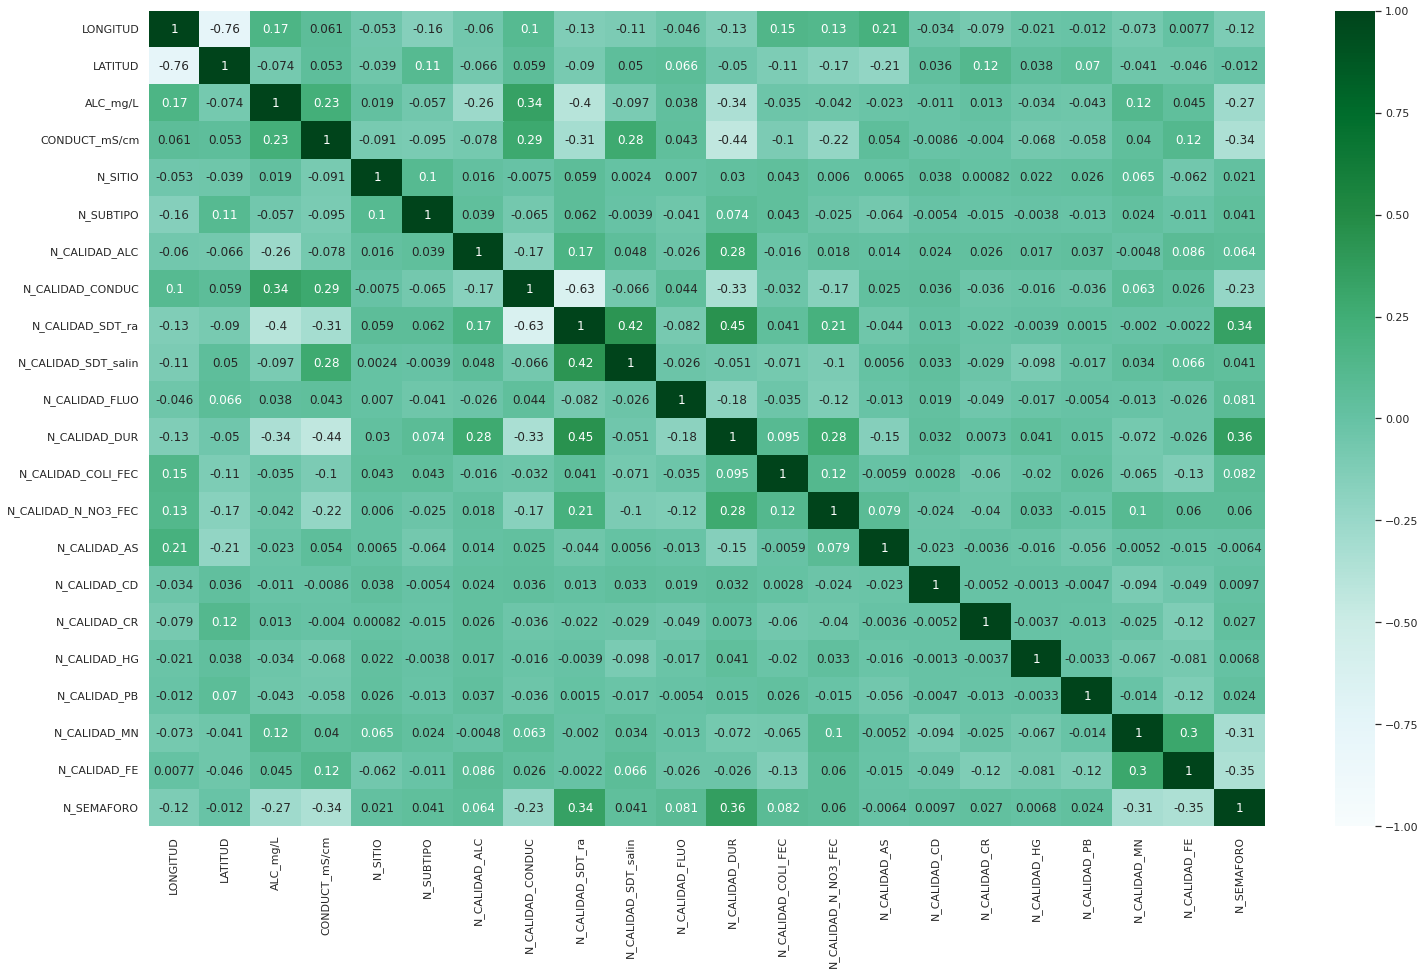

In [70]:
sns.set(rc = {'figure.figsize':(25,15)}) 
sns.heatmap(df.corr(), annot = True, cmap = 'BuGn', vmin = -1, vmax = 1)
plt.show()

In [71]:
df["Coordenadas"] = list(zip(df.LONGITUD, df.LATITUD))
df["Coordenadas"] = df["Coordenadas"].apply(Point)
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,...,N_CALIDAD_N_NO3_FEC,N_CALIDAD_AS,N_CALIDAD_CD,N_CALIDAD_CR,N_CALIDAD_HG,N_CALIDAD_PB,N_CALIDAD_MN,N_CALIDAD_FE,N_SEMAFORO,Coordenadas
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,229.990,...,2,0,1,1,1,1,0,0,2,POINT (-102.0221 22.20887)
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,231.990,...,1,0,1,1,1,1,0,0,2,POINT (-102.20075 21.99958)
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,204.920,...,2,1,1,1,1,1,0,0,1,POINT (-102.28801 22.36685)
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,327.000,...,2,0,1,1,1,1,0,0,2,POINT (-102.29449 22.18435)
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,309.885,...,0,2,1,1,1,1,0,0,1,POINT (-110.2448 23.45138)


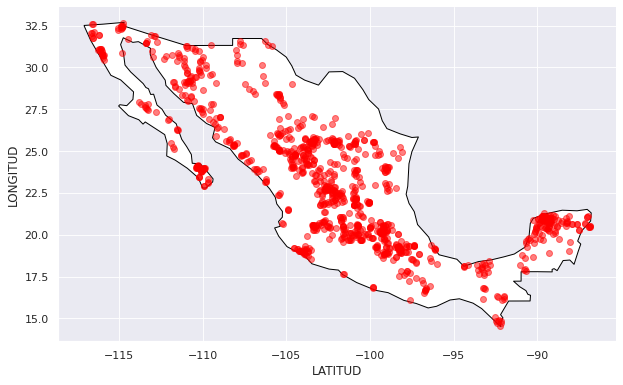

In [72]:
puntos_en_mapa = gpd.GeoDataFrame(df, geometry="Coordenadas")

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

puntos_en_mapa.plot(ax=gax, color='red', alpha = 0.5)
#puntos_en_mapa

## Aplicamos el método de agrupamiento K-means

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning:

Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning:

Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning:

Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning:

Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning:

Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.

/usr/local/lib/python3.7/dist-packages/i

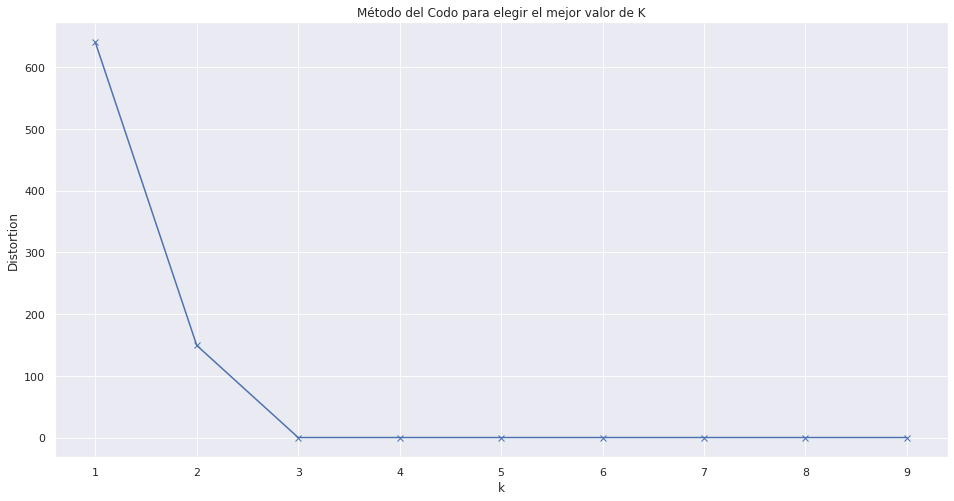

In [73]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df[['N_SEMAFORO']])
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Método del Codo para elegir el mejor valor de K')
plt.show()

In [74]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df[['N_SEMAFORO']])
df['N_SEMAFORO']=kmeanModel.predict(df[['N_SEMAFORO']]).astype(str)
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,...,N_CALIDAD_N_NO3_FEC,N_CALIDAD_AS,N_CALIDAD_CD,N_CALIDAD_CR,N_CALIDAD_HG,N_CALIDAD_PB,N_CALIDAD_MN,N_CALIDAD_FE,N_SEMAFORO,Coordenadas
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,229.990,...,2,0,1,1,1,1,0,0,0,POINT (-102.02210 22.20887)
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,231.990,...,1,0,1,1,1,1,0,0,0,POINT (-102.20075 21.99958)
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,204.920,...,2,1,1,1,1,1,0,0,1,POINT (-102.28801 22.36685)
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,327.000,...,2,0,1,1,1,1,0,0,0,POINT (-102.29449 22.18435)
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,309.885,...,0,2,1,1,1,1,0,0,1,POINT (-110.24480 23.45138)


In [80]:
kmeans = KMeans(n_clusters=3).fit(df[['N_SEMAFORO']])
# Predicting the clusters
labels = kmeans.predict(df[['N_SEMAFORO']])
# Getting the cluster centers
C = kmeans.cluster_centers_
calidad_agua=['Mala','Media','Buena']
asignar=[]
for row in labels:
    asignar.append(calidad_agua[row])

In [81]:
fig = px.scatter_geo(df, lon = 'LONGITUD', lat = 'LATITUD', color = asignar)
fig.update_geos(
    visible=False, resolution=110, #scope="north america",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Black",
    fitbounds="locations"
)

fig.show()

Tenemos 3 categorías para el semáforo, la púrpura que es la de calidad baja (0), la roja que es de la calidad media (1) y la verde que es de calidad alta (2).

In [84]:
df

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,...,N_CALIDAD_N_NO3_FEC,N_CALIDAD_AS,N_CALIDAD_CD,N_CALIDAD_CR,N_CALIDAD_HG,N_CALIDAD_PB,N_CALIDAD_MN,N_CALIDAD_FE,N_SEMAFORO,Coordenadas
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,229.990,...,2,0,1,1,1,1,0,0,0,POINT (-102.02210 22.20887)
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,231.990,...,1,0,1,1,1,1,0,0,0,POINT (-102.20075 21.99958)
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,204.920,...,2,1,1,1,1,1,0,0,1,POINT (-102.28801 22.36685)
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,327.000,...,2,0,1,1,1,1,0,0,0,POINT (-102.29449 22.18435)
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,309.885,...,0,2,1,1,1,1,0,0,1,POINT (-110.24480 23.45138)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,231.045,...,0,2,1,1,1,1,0,0,1,POINT (-99.54191 24.76036)
1050,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,256.000,...,0,2,1,1,1,1,0,0,1,POINT (-99.70099 24.78280)
1051,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,330.690,...,0,2,1,1,1,1,0,0,1,POINT (-99.82249 25.55197)
1052,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,193.140,...,2,2,1,1,1,1,0,0,0,POINT (-100.32683 24.80118)


In [99]:
df.replace('<20',20, inplace= True)
df.replace('<25',25, inplace= True)
df.replace('<1.1',1.1, inplace= True)
df.replace('<0.02',0.02, inplace= True)
df.replace('<0.01',0.01, inplace= True)
df.replace('<0.003',0.003, inplace= True)
df.replace('<0.005',0.005, inplace= True)
df.replace('<0.0005',0.0005, inplace= True)
df.replace('<0.0015',0.0015, inplace= True)
df.replace('<0.025',0.025, inplace= True)
df.replace('<0.2',0.2, inplace= True)
 
df.replace('SI',1, inplace= True)
df.replace('NO',0, inplace= True)
df.replace('ND',0, inplace= True)

In [118]:
X = pd.DataFrame(df.drop(['CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR','CALIDAD_COLI_FEC','CALIDAD_N_NO3',
                       'CALIDAD_AS','CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB','CALIDAD_MN','CALIDAD_FE','CLAVE','SITIO','ORGANISMO_DE_CUENCA',
                       'ESTADO','MUNICIPIO','ACUIFERO','SEMAFORO','CALIDAD_ALC','SUBTIPO','Coordenadas','N_SEMAFORO'], axis = 1))

y = pd.DataFrame(df['N_SEMAFORO'])

In [119]:
X

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,...,N_CALIDAD_DUR,N_CALIDAD_COLI_FEC,N_CALIDAD_N_NO3_FEC,N_CALIDAD_AS,N_CALIDAD_CD,N_CALIDAD_CR,N_CALIDAD_HG,N_CALIDAD_PB,N_CALIDAD_MN,N_CALIDAD_FE
0,-102.02210,22.20887,229.990,940.0,603.6,0.9766,213.732,1.1,4.184656,0.0161,...,1,4,2,0,1,1,1,1,0,0
1,-102.20075,21.99958,231.990,608.0,445.4,0.9298,185.0514,1.1,5.75011,0.0134,...,1,4,1,0,1,1,1,1,0,0
2,-102.28801,22.36685,204.920,532.0,342,1.8045,120.719,1.1,1.449803,0.037,...,1,4,2,1,1,1,1,1,0,0
3,-102.29449,22.18435,327.000,686.0,478.6,1.1229,199.879,1.1,1.258597,0.0154,...,1,4,2,0,1,1,1,1,0,0
4,-110.24480,23.45138,309.885,1841.0,1179,0.2343,476.9872,291,15.672251,0.01,...,1,0,0,2,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,-99.54191,24.76036,231.045,2350.0,1545.8,0.2,752.096,1.1,14.615488,0.01,...,0,4,0,2,1,1,1,1,0,0
1050,-99.70099,24.78280,256.000,529.0,297,0.2,273,1.1,77.392,0.01,...,1,4,0,2,1,1,1,1,0,0
1051,-99.82249,25.55197,330.690,2600.0,1873,0.7574,660.2126,620,36.477104,0.01,...,0,0,0,2,1,1,1,1,0,0
1052,-100.32683,24.80118,193.140,873.0,690.6667,0.7108,406.368,1.1,0.02,0.01,...,1,4,2,2,1,1,1,1,0,0


In [120]:
y

,N_SEMAFORO
0,0
1,0
2,1
3,0
4,1
...,...
1049,1
1050,1
1051,1
1052,0


In [121]:
Xtv, Xtest, ytv, ytest = train_test_split(X,y, train_size=0.75, random_state=100, stratify = y[['N_SEMAFORO']])

Xtv.dropna()
Xtest.dropna()

print(ytv['N_SEMAFORO'].value_counts())
print(ytest['N_SEMAFORO'].value_counts())

0    320
1    286
2    184
Name: N_SEMAFORO, dtype: int64
0    107
1     96
2     61
Name: N_SEMAFORO, dtype: int64


In [122]:
NumericList = ['SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L',
                        'CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L','LONGITUD','LATITUD']

BinaryList = ['CUMPLE_CON_ALC','CUMPLE_CON_COND','CUMPLE_CON_SDT_ra','CUMPLE_CON_SDT_salin','CUMPLE_CON_FLUO','CUMPLE_CON_DUR','CUMPLE_CON_CF',
                       'CUMPLE_CON_NO3','CUMPLE_CON_AS','CUMPLE_CON_CD','CUMPLE_CON_CR','CUMPLE_CON_HG','CUMPLE_CON_PB','CUMPLE_CON_MN','CUMPLE_CON_FE']

#Define each pipeline for each type of category

NumericColumnsPipeline = Pipeline(steps= [('MinMax', MinMaxScaler(feature_range=(1, 2))),('inputdata',SimpleImputer(strategy='most_frequent'))])
BinaryColumnsPipeline = Pipeline(steps= [('inputdata',SimpleImputer(strategy='most_frequent'))])

#Define the column transformer that applies pipelines

TransformColumns = ColumnTransformer(transformers = [('numerical',NumericColumnsPipeline,NumericList),('BinaryList',BinaryColumnsPipeline,BinaryList)],remainder='passthrough')

#Call column transformer

Xtvfit = TransformColumns.fit(Xtv)
Xtestfit = TransformColumns.fit(Xtest)


Xtvt = pd.DataFrame(Xtvfit.transform(Xtv))
Xtestt = pd.DataFrame(Xtestfit.transform(Xtest))

Xtvt.columns = Xtv.columns

Xtestt.columns = Xtest.columns

In [123]:
def get_models():

  models = list()
  names = list()

  # LR - Regresión Logística:
  models.append(LogisticRegression(solver='liblinear'))
  names.append('LogisticRegression')

  # DT - Decision Tree:
  models.append(DecisionTreeClassifier())
  names.append('DecisionTree')

  # RF - Random Forest:
  models.append(RandomForestClassifier())
  names.append('RandomForest')

  return models, names

In [124]:
def my_accuracy(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  accuracy = (tp+tn)/(tp+tn+fp+fn)
  return accuracy

def my_precision(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  precision = tp/(tp+fp)
  return precision

def my_recall(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  recall = tp/(tp+fn)
  return recall

def my_f1score(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f1score = 2*tp / 2*tp + fp + fn 
  return f1score

def my_gmean(yreal, ypred):
  cm = confusion_matrix(ypred, yreal)
  vn,fp,fn,vp = cm[0,0],cm[1,0],cm[0,1],cm[1,1]
  gmean = np.sqrt((vp / (vp+fn))*(vn / (vn+fp)))
  return gmean

In [125]:
Xtvt

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,...,N_CALIDAD_DUR,N_CALIDAD_COLI_FEC,N_CALIDAD_N_NO3_FEC,N_CALIDAD_AS,N_CALIDAD_CD,N_CALIDAD_CR,N_CALIDAD_HG,N_CALIDAD_PB,N_CALIDAD_MN,N_CALIDAD_FE
0,1.095651,1.054984,1.260253,1.000000,1.049437,1.000000,1.0,1.000000,1.000000,1.0,...,0.0,4.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0
1,1.097237,1.097502,1.071314,1.000000,1.055400,1.133501,1.0,1.023866,1.000000,1.0,...,1.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2,1.022490,1.000933,1.051629,1.000000,1.034569,1.000000,1.0,1.000000,1.000000,1.0,...,1.0,4.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0
3,1.116673,1.000000,1.198816,1.000000,1.026807,1.000000,1.0,1.000000,1.000000,1.0,...,0.0,4.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0
4,1.012197,1.166701,1.000000,1.000000,1.055731,1.053233,1.0,1.000000,1.000000,1.0,...,3.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,1.023462,1.006371,1.080724,1.000000,1.041262,1.000000,1.0,1.227017,1.000000,1.0,...,1.0,4.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0
786,1.035638,1.050098,1.055089,1.000000,1.018645,1.000836,1.0,1.000000,1.000000,1.0,...,1.0,4.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
787,1.030085,1.031798,1.062949,1.020902,1.096112,1.000000,1.0,1.000000,1.000000,1.0,...,1.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0
788,1.055590,1.025617,1.096025,1.000000,1.195301,1.000000,1.0,1.191695,1.720339,1.0,...,1.0,4.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0


In [126]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(Xtvt, ytv.values.ravel())
featuredf = pd.DataFrame(rf.feature_importances_)
featuredf.set_index(Xtvt.columns, inplace = True)
from natsort import index_natsorted
featuredf.sort_values(by=0, inplace = True, ascending= False)
print('feature importances in order are: ')
featuredf

feature importances in order are: 


,0
ALC_mg/L,0.184660
CD_TOT_mg/L,0.122278
LATITUD,0.101798
N_CALIDAD_DUR,0.082551
CUMPLE_CON_SDT_salin,0.066211
CR_TOT_mg/L,0.057984
CUMPLE_CON_FE,0.040326
CUMPLE_CON_MN,0.037459
SDT_M_mg/L,0.030406
CONDUCT_mS/cm,0.027780


In [127]:
models, names = get_models()
resultados = list()

mismetricas = {
    "accuracy": make_scorer(accuracy_score),
}

for i in range(len(models)):
  
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
  pipeline = Pipeline(steps=[('m',models[i].fit(Xtvt,ytv.values.ravel()))])

  resultadosOU = cross_validate(pipeline, Xtvt, ytv.values.ravel(), scoring=mismetricas, cv=kfold,return_train_score=True)

  resultados.append(resultadosOU)
  
  print('Training score\n')

  print('%s:\nmean Accuracy: %.3f (%.4f)\n' % (names[i],
                                                                          np.mean(resultadosOU['train_accuracy']),
                                                                          np.std(resultadosOU['train_accuracy']),
                                                                          ))
  
  print('Test score\n')

  print('%s:\nmean Accuracy: %.3f (%.4f)\n' % (names[i],
                                                                          np.mean(resultadosOU['test_accuracy']),
                                                                          np.std(resultadosOU['test_accuracy']),                                            
                                                                          ))

Training score

LogisticRegression:
mean Accuracy: 0.984 (0.0025)

Test score

LogisticRegression:
mean Accuracy: 0.965 (0.0189)

Training score

DecisionTree:
mean Accuracy: 1.000 (0.0000)

Test score

DecisionTree:
mean Accuracy: 0.969 (0.0158)

Training score

RandomForest:
mean Accuracy: 1.000 (0.0000)

Test score

RandomForest:
mean Accuracy: 0.975 (0.0147)



Test Boxplots


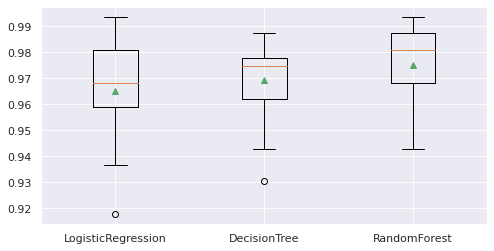

In [128]:
sns.set(rc={'figure.figsize':(8,4)})

bpGmean = list()

for i in range(len(resultados)):
  rr = resultados[i]['test_accuracy']
  bpGmean.append(rr)

plt.boxplot(bpGmean, labels=names, showmeans=True)

print('Test Boxplots')
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

delta_train_sz = np.linspace(0.1,1, num=20)

RFModel = RandomForestClassifier()
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

GSRF = GridSearchCV(estimator=RFModel,
            param_grid={'ccp_alpha': [.1,10,100],'criterion': ('gini', 'entropy'), 'max_depth': [1,3,5,7,9], 'min_samples_split':[2,4,6], 'class_weight':['balanced'], 'min_samples_leaf': [2,4,6]}, cv = kfold, scoring = 'recall')

GSRF.fit(Xtvt,ytv.values.ravel())

In [130]:
print("Best parameter (recall score=%0.3f):" % GSRF.best_score_)
print(GSRF.best_params_)

Best parameter (recall score=nan):
{'ccp_alpha': 0.1, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [132]:
from pprint import pprint as pp

BestRFModel = RandomForestClassifier(ccp_alpha = 0.1, criterion = 'gini', max_depth = 1, min_samples_split = 2, class_weight = 'balanced', min_samples_leaf = 2)
BestRFModel.fit(Xtvt,ytv.values)
ypred = BestRFModel.predict(Xtestt)
r = classification_report(ytest, ypred)
print("This is the classification report of the best model:\n\n", r)

This is the classification report of the best model:

               precision    recall  f1-score   support

           0       0.66      0.99      0.79       107
           1       1.00      0.43      0.60        96
           2       0.61      0.62      0.62        61

    accuracy                           0.70       264
   macro avg       0.76      0.68      0.67       264
weighted avg       0.77      0.70      0.68       264



Confusion matrix, without normalization
[[106   1   0]
 [ 31  42  23]
 [ 22   1  38]]
Normalized confusion matrix
[[0.99 0.01 0.  ]
 [0.32 0.44 0.24]
 [0.36 0.02 0.62]]


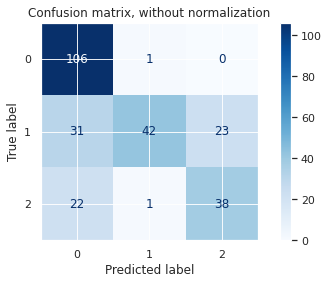

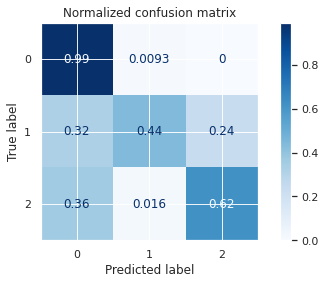

In [134]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = RandomForestClassifier(ccp_alpha = 0.1, criterion = 'gini', max_depth = 1, min_samples_split = 2, class_weight = 'balanced', min_samples_leaf = 2).fit(Xtvt,ytv.values)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        Xtestt,
        ytest,
        display_labels=ytest['N_SEMAFORO'].unique(),
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()